# Baseline Model based on U-Net

In [2]:
import os

# needed to get the path right
os.chdir("..")

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

/Users/jh/ai/courses/stanford/3-ML_RL/final_project/xcs229ii_final_project/code


## Training

In [4]:
from baseline.trainer import Trainer

trainer = Trainer()

Segmentation Models: using `tf.keras` framework.


In [5]:
model = trainer.get_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [24]:
%time history = trainer.train_from_simple_dataloader(dataset_size=20, batch_size=1, epochs=20)

Epoch 1/20
20/20 - 66s - loss: 1.4283 - iou_score: 0.2150 - f1-score: 0.3471 - f2-score: 0.4256 - recall: 0.5415 - precision: 0.2779 - val_loss: 1.5033 - val_iou_score: 0.2297 - val_f1-score: 0.3536 - val_f2-score: 0.4659 - val_recall: 0.7033 - val_precision: 0.2786
Epoch 2/20
20/20 - 62s - loss: 1.1914 - iou_score: 0.2943 - f1-score: 0.4465 - f2-score: 0.5465 - recall: 0.6918 - precision: 0.3581 - val_loss: 1.6298 - val_iou_score: 0.2482 - val_f1-score: 0.3733 - val_f2-score: 0.5086 - val_recall: 0.8094 - val_precision: 0.2824
Epoch 3/20
20/20 - 61s - loss: 1.0749 - iou_score: 0.3414 - f1-score: 0.4988 - f2-score: 0.6067 - recall: 0.7608 - precision: 0.4024 - val_loss: 1.6097 - val_iou_score: 0.2539 - val_f1-score: 0.3806 - val_f2-score: 0.5181 - val_recall: 0.8229 - val_precision: 0.2882
Epoch 4/20
20/20 - 64s - loss: 0.9886 - iou_score: 0.3785 - f1-score: 0.5374 - f2-score: 0.6486 - recall: 0.8046 - precision: 0.4370 - val_loss: 1.4991 - val_iou_score: 0.2257 - val_f1-score: 0.3485 

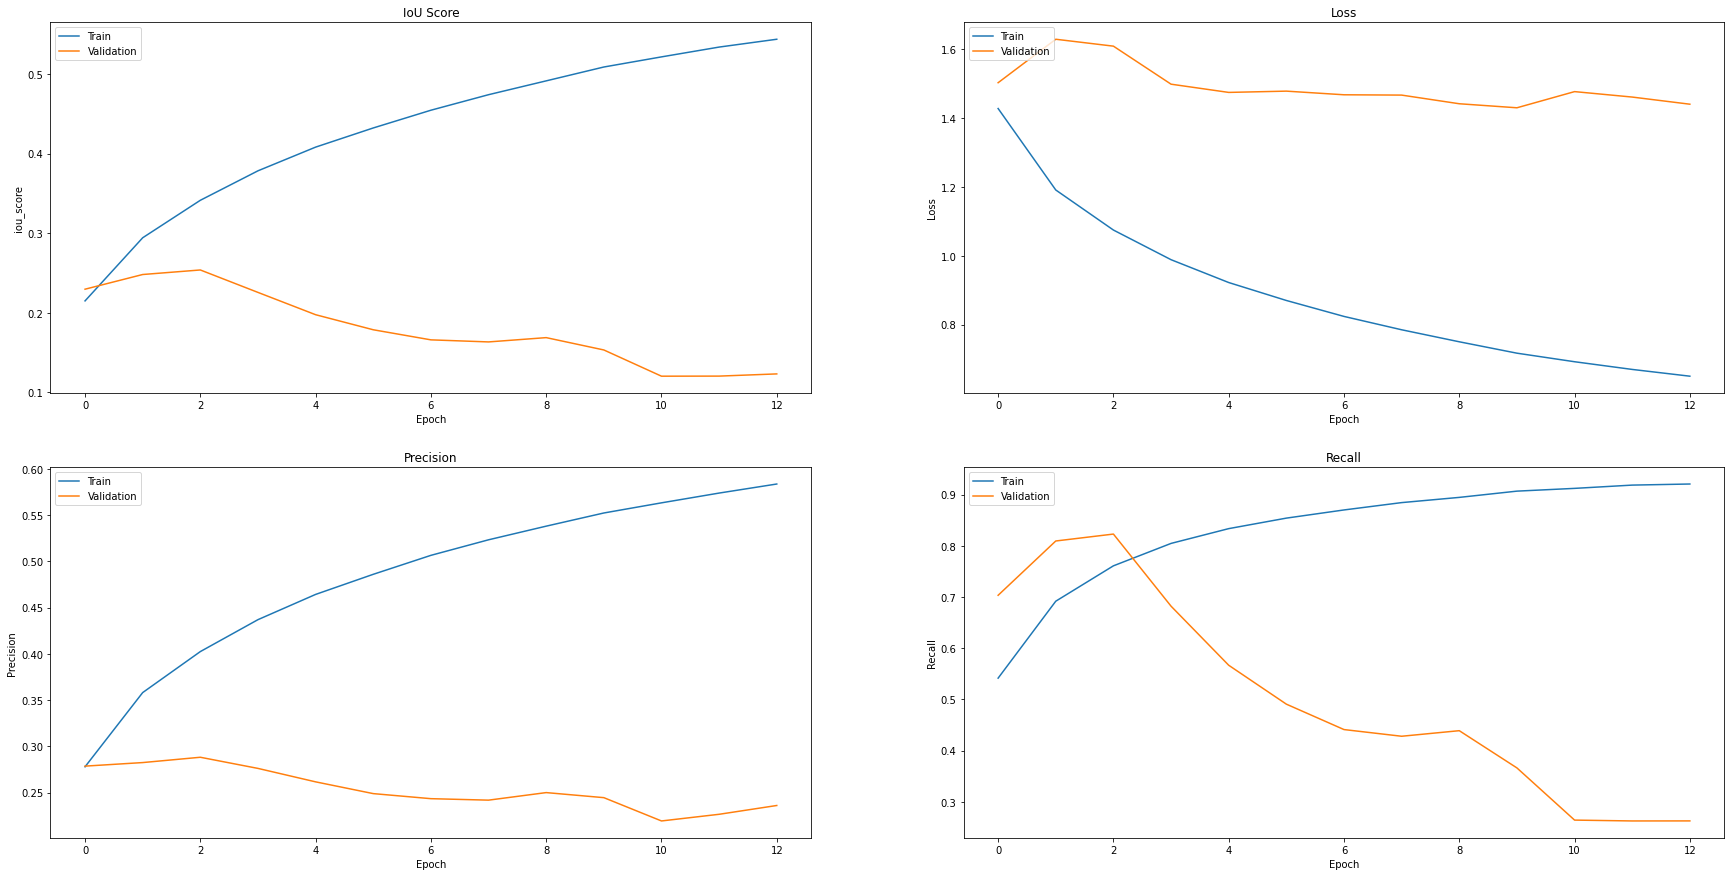

In [25]:
%load_ext autoreload
%autoreload 2

from utils.helper import Visualisation

Visualisation().plot_curves(history.history)

## Prediction

Run prediction on trained model.

### Helper methods

In [26]:
from utils.dataloader import SimpleDataLoader

def load_images(image_dir, load_masks=False, size=5):
    simple_data_loader = SimpleDataLoader(
        backbone=Trainer.BACKBONE,
        images_path=os.path.join(image_dir, "images"),
        mask_path=os.path.join(image_dir, "masks"),
        size=size
    )
    
    images = simple_data_loader.get_images()
    masks = None
    
    if load_masks:
        masks = simple_data_loader.get_masks()
        
    return images, masks


In [27]:
from utils.helper import Visualisation

def plot_images_masks(model, images, masks=None):
    for index, image in enumerate(images):
        image = np.expand_dims(image, axis=0)
        print(f"Image shape: {image.shape}")

        predicted_mask = model.predict(image).round()
        print(f"Predicted mask shape: {predicted_mask.shape}")
        
        mask = None
        
        if masks is not None:
            mask = masks[index]
            print(f"Mask shape: {mask.shape}")
        
        if mask is None:
            Visualisation().plot_images(
                image=image.squeeze(),
                predicted_mask=predicted_mask[..., 0].squeeze()
            )
        else:
            Visualisation().plot_images(
                image=image.squeeze(),
                predicted_mask=predicted_mask[..., 0].squeeze(),
                mask=mask.squeeze()
            )

In [28]:
from constants import TRAIN_DIR

train_images, train_masks = load_images(TRAIN_DIR, load_masks=True)

(512, 512, 3)
(1, 512, 512, 3)


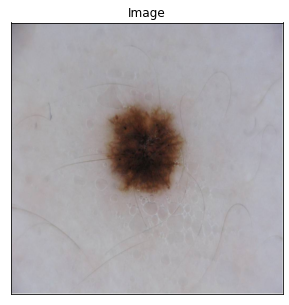

In [29]:
import numpy as np

train_image = train_images[1]

print(train_image.shape)
train_image = np.expand_dims(train_image, axis=0)  # add batch dimension
print(train_image.shape)

Visualisation().plot_images(image=train_image.squeeze())

In [30]:
model.load_weights(os.path.join("baseline", "export", "baseline.h5"))

In [31]:
predicted_mask = model.predict(train_image).round()
print(predicted_mask.shape)

(1, 512, 512, 1)


In [32]:
predicted_mask[..., 0].shape

(1, 512, 512)

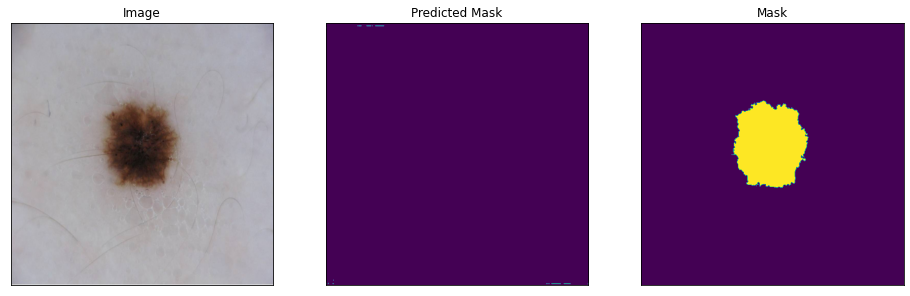

In [33]:
Visualisation().plot_images(
    image=train_image.squeeze(),
    predicted_mask=predicted_mask[..., 0].squeeze(),
    mask=train_masks[1]
)

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)
Mask shape: (512, 512, 1)


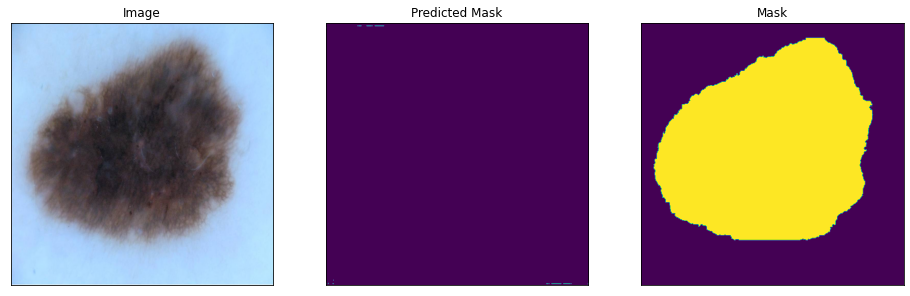

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)
Mask shape: (512, 512, 1)


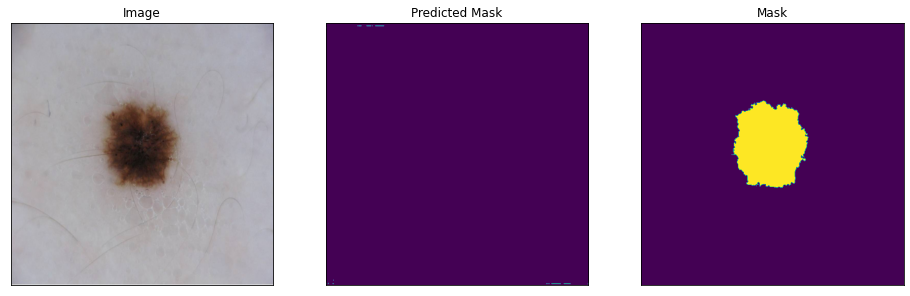

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)
Mask shape: (512, 512, 1)


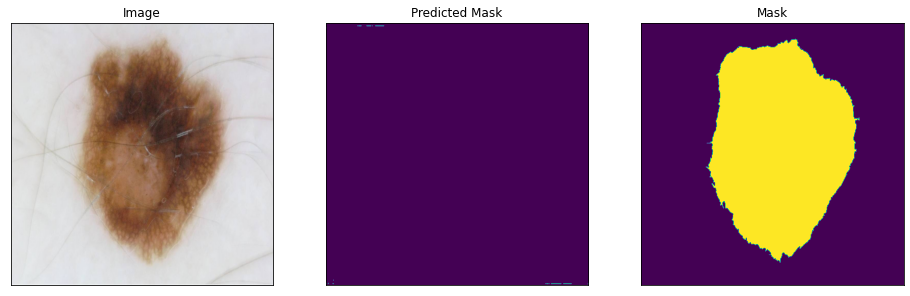

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)
Mask shape: (512, 512, 1)


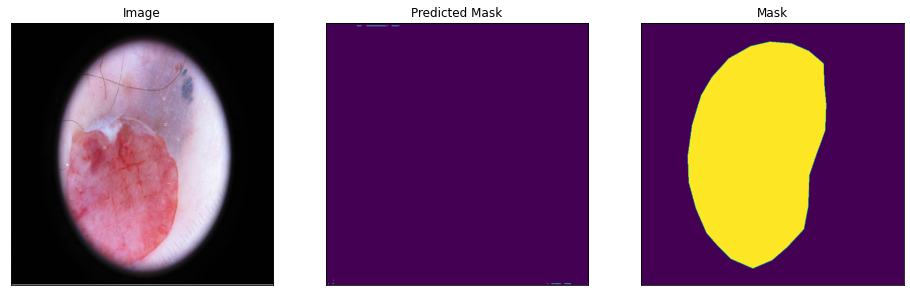

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)
Mask shape: (512, 512, 1)


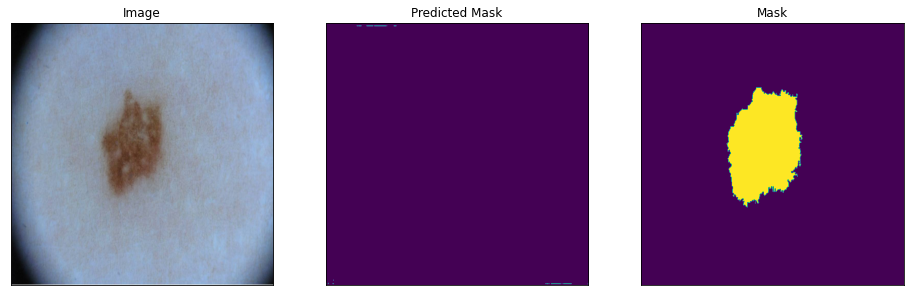

In [34]:
plot_images_masks(model, train_images, train_masks)

### From Azure Instance

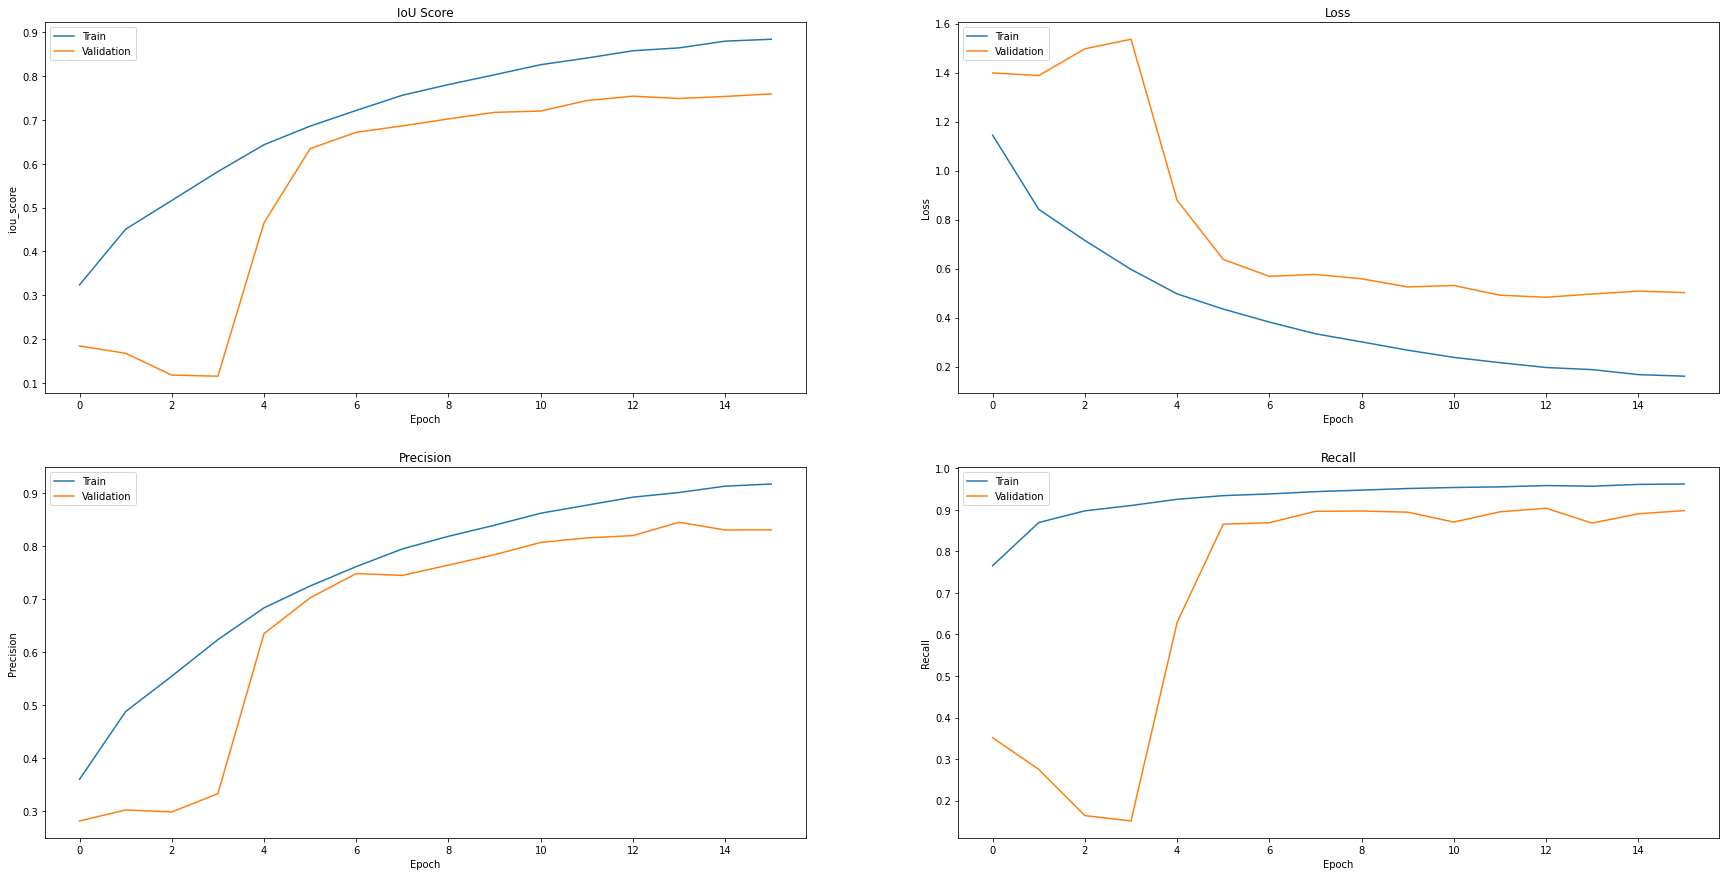

In [18]:
from utils.helper import Visualisation
import pickle
import os

AZURE_PATH = os.path.join("baseline", "export", "azure")

azure_hitory_path = os.path.join(AZURE_PATH, "train_history.pkl")
azure_history = pickle.load(open(azure_hitory_path, "rb"))
Visualisation().plot_curves(azure_history)

#### Train Images

In [19]:
from baseline.trainer import Trainer

trainer = Trainer()
azure_model = trainer.get_model()
azure_model.load_weights(os.path.join(AZURE_PATH, "baseline.h5"))

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)
Mask shape: (512, 512, 1)


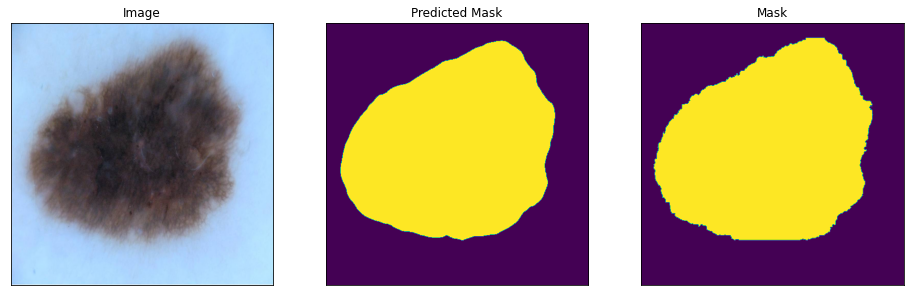

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)
Mask shape: (512, 512, 1)


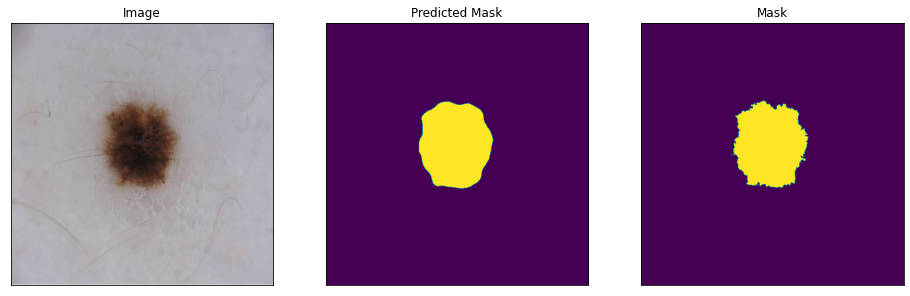

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)
Mask shape: (512, 512, 1)


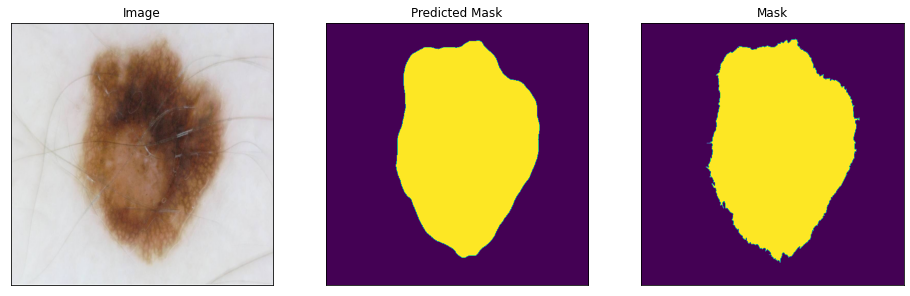

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)
Mask shape: (512, 512, 1)


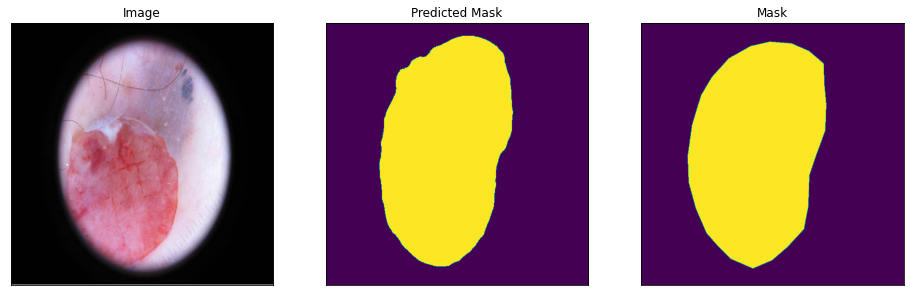

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)
Mask shape: (512, 512, 1)


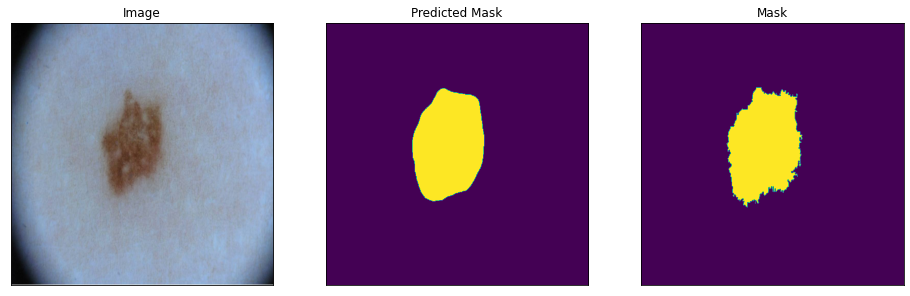

In [20]:
plot_images_masks(azure_model, train_images, train_masks)

#### Test Images (Unseen)

In [21]:
from constants import TEST_DIR

train_images, _ = load_images(TEST_DIR, load_masks=True)

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)


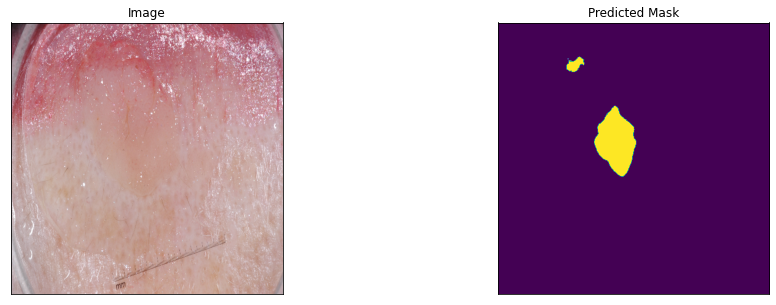

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)


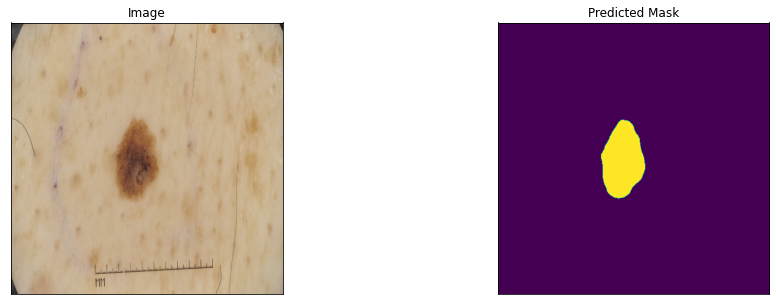

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)


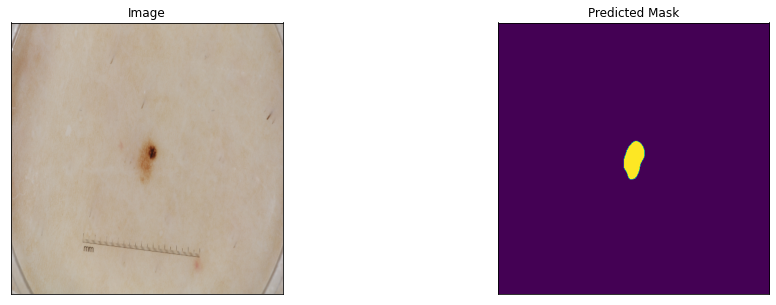

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)


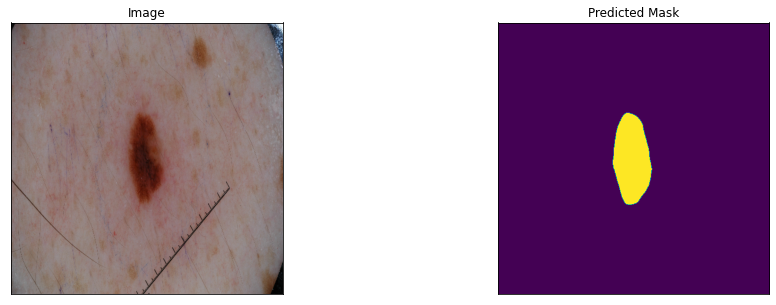

Image shape: (1, 512, 512, 3)
Predicted mask shape: (1, 512, 512, 1)


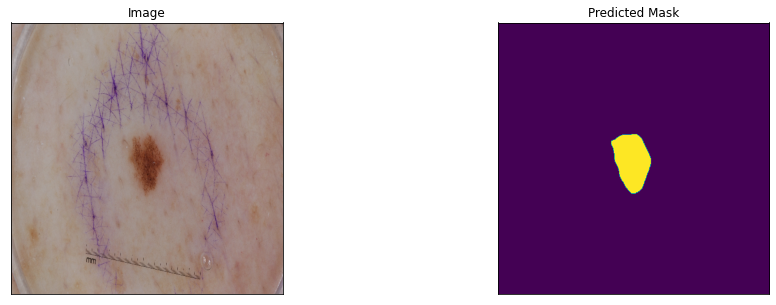

In [22]:
plot_images_masks(azure_model, train_images)